In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [55]:
housing=pd.read_csv('https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv')

In [20]:
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [21]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [22]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [49]:
housing['median_income']*1000

0        8325.2
1        8301.4
2        7257.4
3        5643.1
4        3846.2
          ...  
20635    1560.3
20636    2556.8
20637    1700.0
20638    1867.2
20639    2388.6
Name: median_income, Length: 20640, dtype: float64

#visiualization

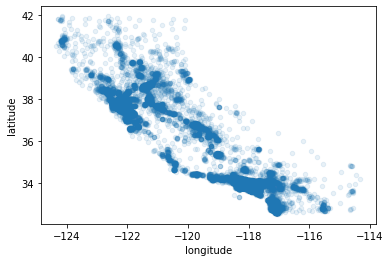

In [18]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

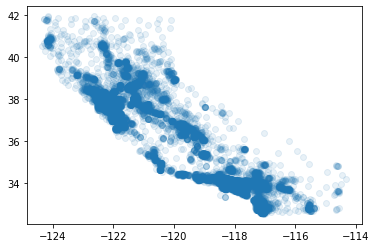

In [ ]:
plt.scatter(x=housing["longitude"],y=housing["latitude"],alpha=0.1)

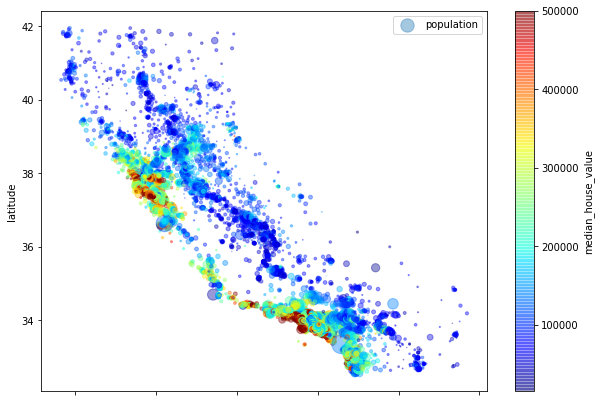

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=housing["population"]/100, label="population", figsize=(10,7),
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)

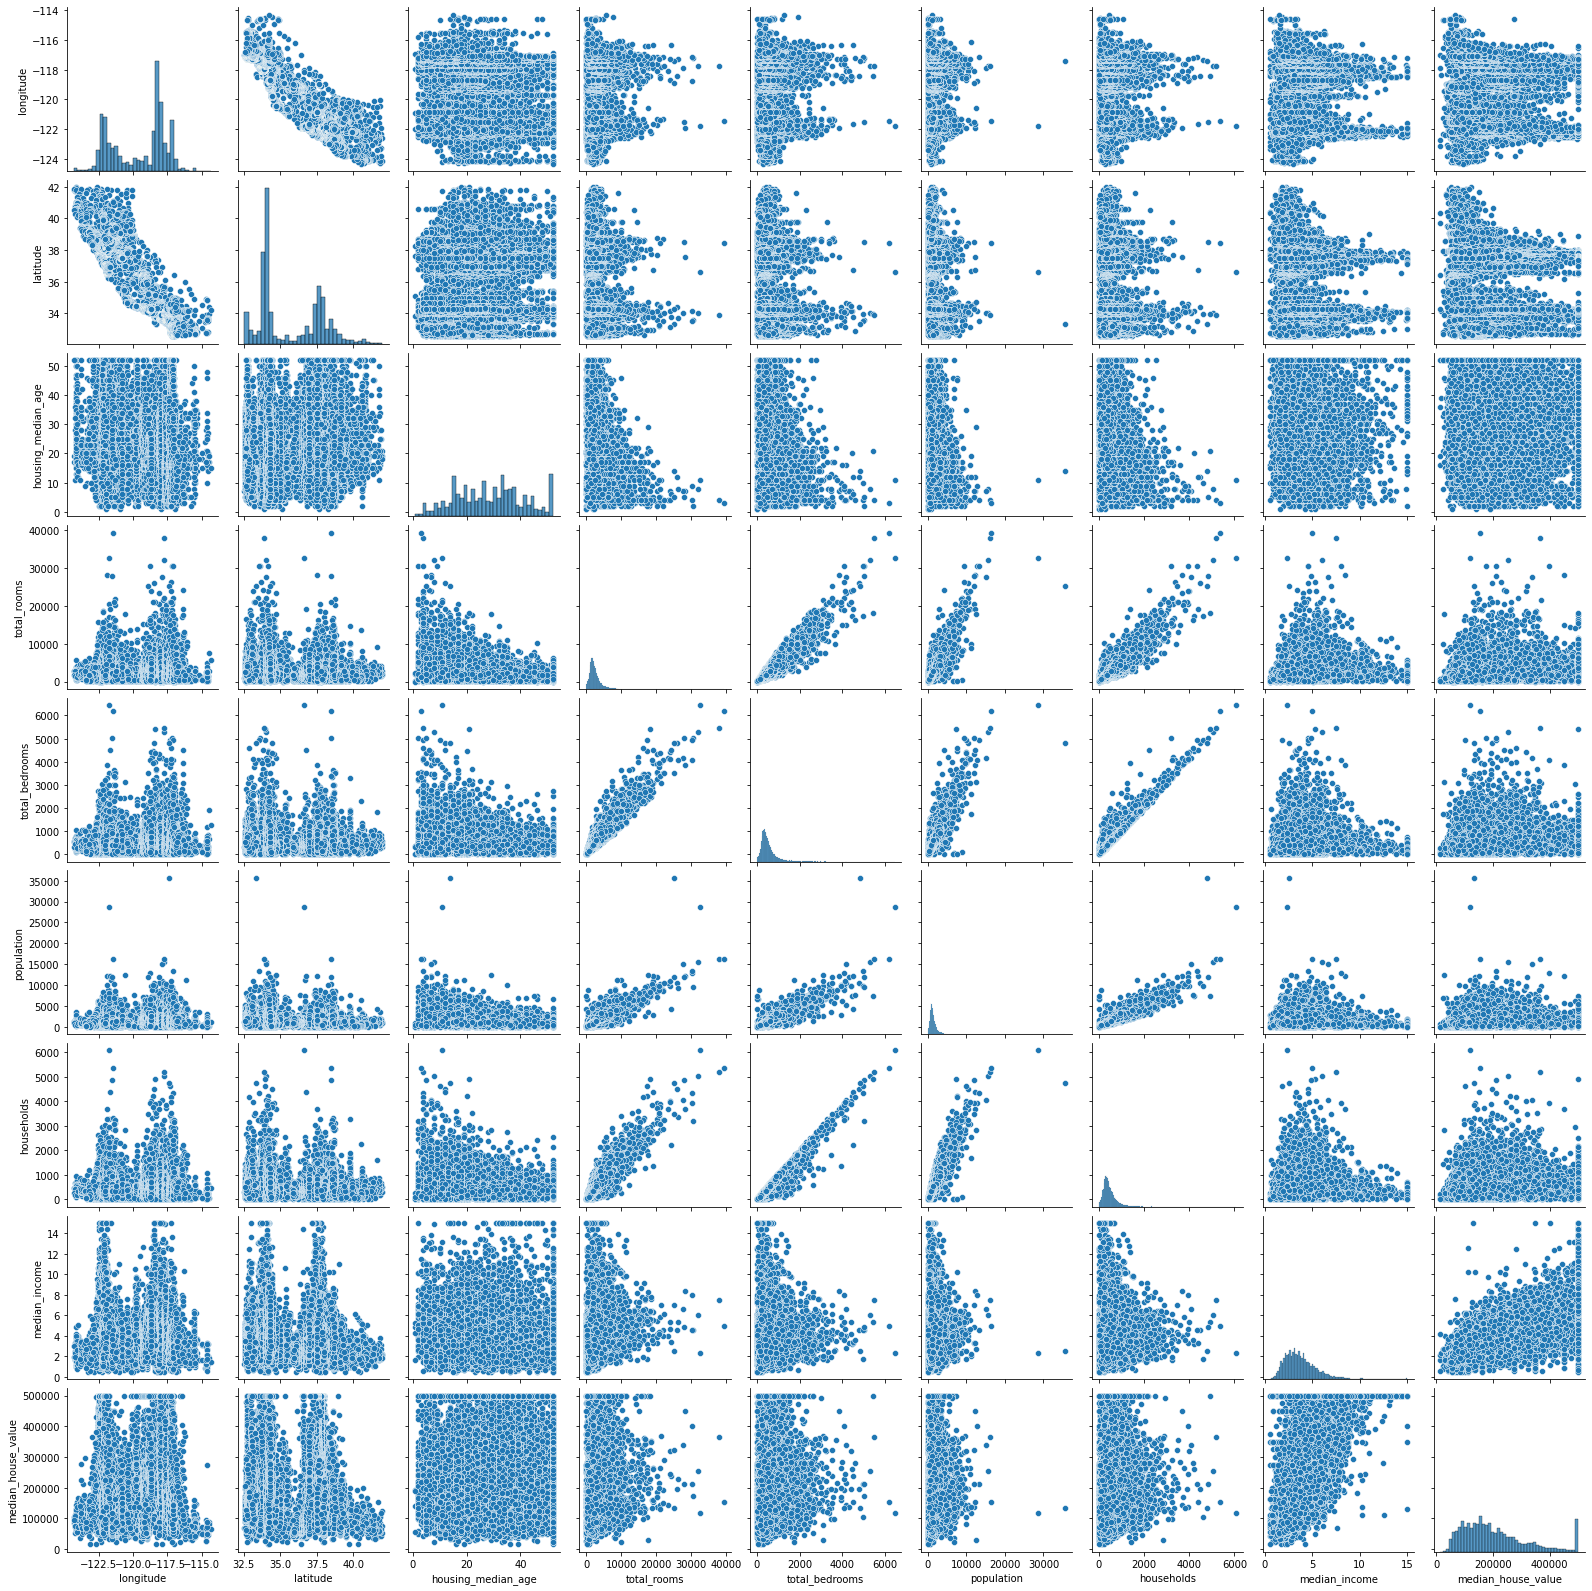

In [ ]:
sns.pairplot(housing)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f557b45ad10>,
      dtype=object)

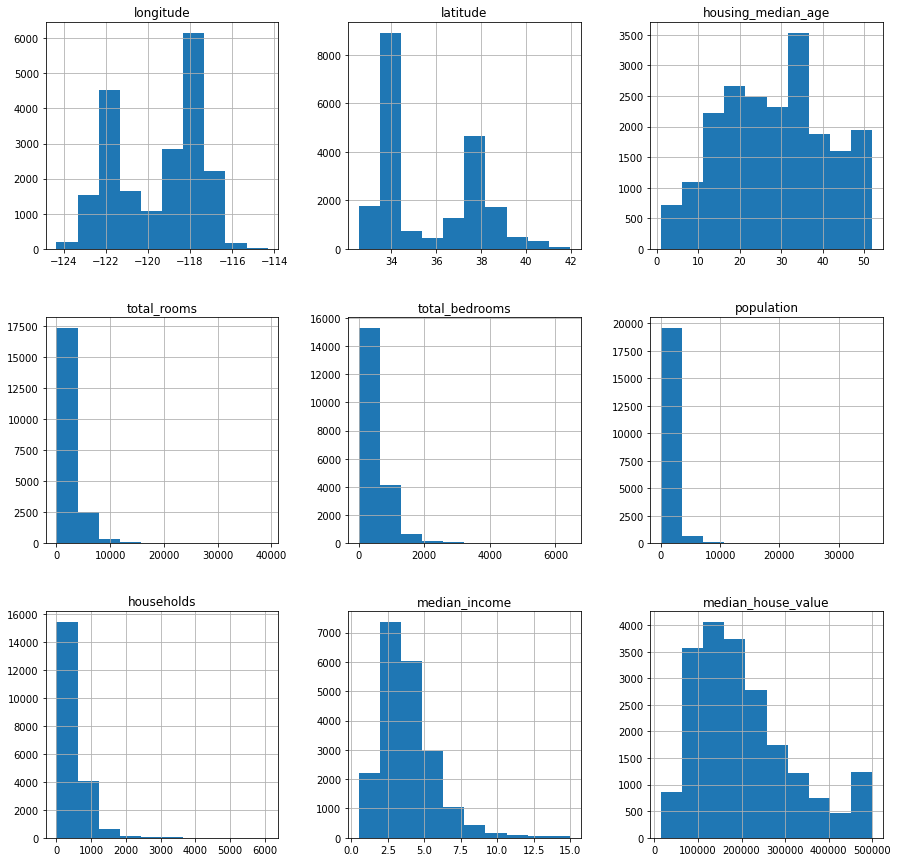

In [ ]:
housing.hist(figsize=[15,15])

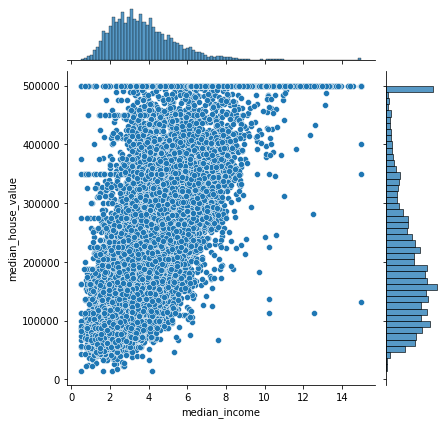

In [ ]:
sns.jointplot(x="median_income",y="median_house_value",data=housing)

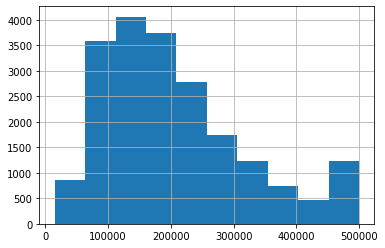

In [ ]:
housing['median_house_value'].hist()


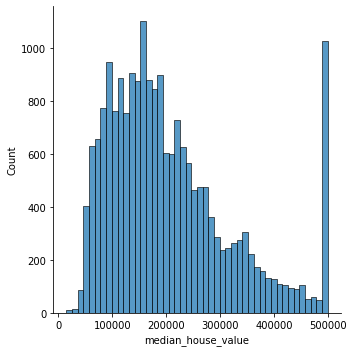

In [ ]:
sns.displot(housing['median_house_value'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


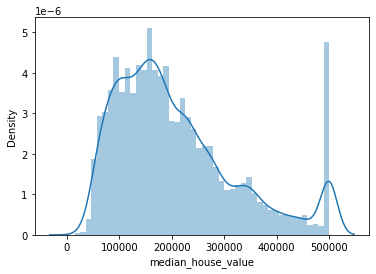

In [ ]:
sns.distplot(housing.median_house_value)

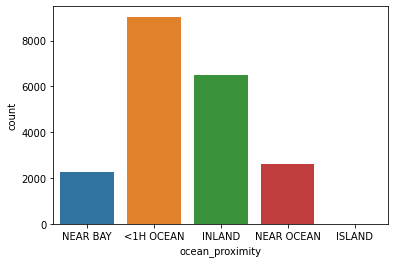

In [ ]:
sns.countplot(x='ocean_proximity',data=housing)

In [ ]:
housing.ocean_proximity.value_counts()


<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


In [ ]:
corr_matrix=housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

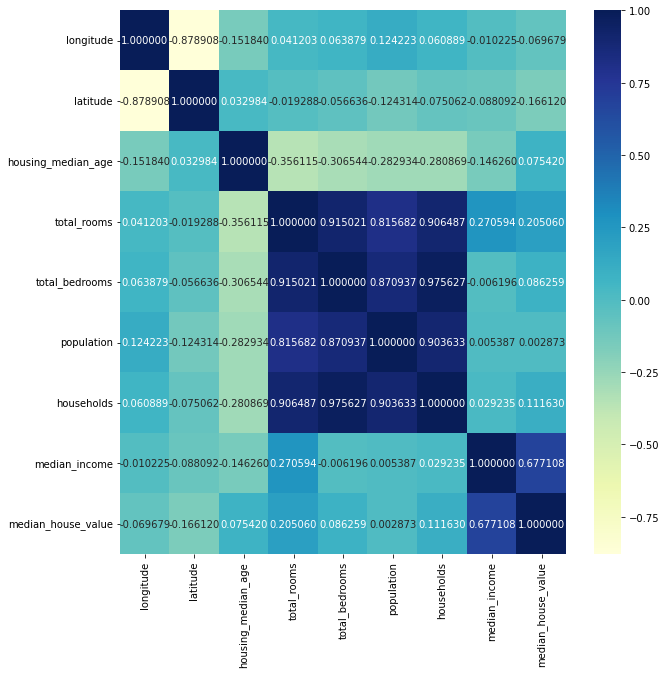

In [ ]:
plt.figure(figsize=[10,10])
sns.heatmap(housing.corr(method="spearman"),annot=True,fmt="f",cmap='YlGnBu',)

In [ ]:
housing.ocean_proximity.value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

#feature extracion

In [56]:
##feature extraction
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [57]:
housing0=housing.drop(['total_rooms','total_bedrooms','population','households'],axis=1)

In [58]:
housing0

,longitude,latitude,housing_median_age,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1.5603,78100.0,INLAND,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,2.5568,77100.0,INLAND,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,1.7000,92300.0,INLAND,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1.8672,84700.0,INLAND,5.329513,0.219892,2.123209


#dummies

In [59]:
##
dummies=pd.get_dummies(housing0.ocean_proximity)

In [60]:
 housing1=pd.concat([housing0,dummies],axis=1,)
 housing1.drop('ocean_proximity',axis=1,inplace=True)
 

In [61]:
housing1

,longitude,latitude,housing_median_age,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,8.3252,452600.0,6.984127,0.146591,2.555556,0,0,0,1,0
1,-122.22,37.86,21.0,8.3014,358500.0,6.238137,0.155797,2.109842,0,0,0,1,0
2,-122.24,37.85,52.0,7.2574,352100.0,8.288136,0.129516,2.802260,0,0,0,1,0
3,-122.25,37.85,52.0,5.6431,341300.0,5.817352,0.184458,2.547945,0,0,0,1,0
4,-122.25,37.85,52.0,3.8462,342200.0,6.281853,0.172096,2.181467,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1.5603,78100.0,5.045455,0.224625,2.560606,0,1,0,0,0
20636,-121.21,39.49,18.0,2.5568,77100.0,6.114035,0.215208,3.122807,0,1,0,0,0
20637,-121.22,39.43,17.0,1.7000,92300.0,5.205543,0.215173,2.325635,0,1,0,0,0
20638,-121.32,39.43,18.0,1.8672,84700.0,5.329513,0.219892,2.123209,0,1,0,0,0


#onehotencoder

In [62]:
#OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
prox_encoded=OneHotEncoder()
ocean_prox_encoded=prox_encoded.fit_transform(housing[['ocean_proximity']]).toarray()

In [63]:
ocean_prox=pd.DataFrame(ocean_prox_encoded,columns=['<1H OCEAN','INLAND','ISLAND','NEAR BAY','NEAR OCEAN '])
housing1=pd.concat([housing0,ocean_prox],axis=1)

In [64]:
housing1.drop('ocean_proximity',axis=1,inplace=True)

In [65]:
housing1

,longitude,latitude,housing_median_age,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,8.3252,452600.0,6.984127,0.146591,2.555556,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,8.3014,358500.0,6.238137,0.155797,2.109842,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,7.2574,352100.0,8.288136,0.129516,2.802260,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,5.6431,341300.0,5.817352,0.184458,2.547945,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,3.8462,342200.0,6.281853,0.172096,2.181467,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1.5603,78100.0,5.045455,0.224625,2.560606,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,2.5568,77100.0,6.114035,0.215208,3.122807,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,1.7000,92300.0,5.205543,0.215173,2.325635,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1.8672,84700.0,5.329513,0.219892,2.123209,0.0,1.0,0.0,0.0,0.0


#normalization

In [72]:
##normalization
from sklearn.preprocessing import MinMaxScaler
scaledData = MinMaxScaler()
housing2 = pd.DataFrame(scaledData.fit_transform(housing1),columns=housing1.columns)
housing2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   median_income             20640 non-null  float64
 4   median_house_value        20640 non-null  float64
 5   rooms_per_household       20640 non-null  float64
 6   bedrooms_per_room         20433 non-null  float64
 7   population_per_household  20640 non-null  float64
 8   <1H OCEAN                 20640 non-null  float64
 9   INLAND                    20640 non-null  float64
 10  ISLAND                    20640 non-null  float64
 11  NEAR BAY                  20640 non-null  float64
 12  NEAR OCEAN                20640 non-null  float64
dtypes: float64(13)
memory usage: 2.0 MB


#standarization


In [68]:
#standarization
from sklearn.preprocessing import StandardScaler

num_scaler=StandardScaler()
housing2 = pd.DataFrame(num_scaler.fit_transform(housing1),columns=housing1.columns,index=housing1.index)

In [69]:
housing2.describe()

,longitude,latitude,housing_median_age,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.043300e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04
mean,-6.527810e-15,1.256263e-15,8.557001e-16,3.734255e-16,8.950635e-16,2.704111e-16,-1.989958e-16,6.064808e-19,8.534151e-15,-8.344316e-15,9.836823e-17,2.245947e-14,4.781824e-14
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-2.385992e+00,-1.447568e+00,-2.196180e+00,-1.774299e+00,-1.662641e+00,-1.852319e+00,-1.949575e+00,-2.290000e-01,-8.911557e-01,-6.818890e-01,-1.556621e-02,-3.532643e-01,-3.844665e-01
25%,-1.113209e+00,-7.967887e-01,-8.453931e-01,-6.881186e-01,-7.561633e-01,-3.994496e-01,-6.486829e-01,-6.171062e-02,-8.911557e-01,-6.818890e-01,-1.556621e-02,-3.532643e-01,-3.844665e-01
50%,5.389137e-01,-6.422871e-01,2.864572e-02,-1.767951e-01,-2.353337e-01,-8.078489e-02,-1.703377e-01,-2.431585e-02,-8.911557e-01,-6.818890e-01,-1.556621e-02,-3.532643e-01,-3.844665e-01
75%,7.784964e-01,9.729566e-01,6.643103e-01,4.593063e-01,5.014973e-01,2.519615e-01,4.619056e-01,2.037453e-02,1.122138e+00,1.466514e+00,-1.556621e-02,-3.532643e-01,-3.844665e-01
max,2.625280e+00,2.958068e+00,1.856182e+00,5.858286e+00,2.540411e+00,5.516324e+01,1.357268e+01,1.194191e+02,1.122138e+00,1.466514e+00,6.424173e+01,2.830742e+00,2.601007e+00


#Drop null values

In [81]:
housing2.dropna(inplace=True)

In [82]:
housing2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20433 non-null  float64
 1   latitude                  20433 non-null  float64
 2   housing_median_age        20433 non-null  float64
 3   median_income             20433 non-null  float64
 4   median_house_value        20433 non-null  float64
 5   rooms_per_household       20433 non-null  float64
 6   bedrooms_per_room         20433 non-null  float64
 7   population_per_household  20433 non-null  float64
 8   <1H OCEAN                 20433 non-null  float64
 9   INLAND                    20433 non-null  float64
 10  ISLAND                    20433 non-null  float64
 11  NEAR BAY                  20433 non-null  float64
 12  NEAR OCEAN                20433 non-null  float64
dtypes: float64(13)
memory usage: 2.2 MB


#pipline

In [ ]:
#simpleimputer (mean)
#standerscaler
#onehotencoding

In [83]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [85]:
housing0_num_col = housing0.drop('ocean_proximity',axis=1).columns
housing0_cat_col = ["ocean_proximity"]

num_pipline=Pipeline([
                     ('imuter',SimpleImputer(strategy='median')),
                     ('standarization',StandardScaler())
                     ])
full_pipeline = ColumnTransformer([
("num", num_pipline, housing0_num_col),
("cat", OneHotEncoder(), housing0_cat_col),
])
housing_prepared = full_pipeline.fit_transform(housing0)



In [86]:
num_columns=list(housing0.drop('ocean_proximity',axis=1).columns) 
cat_columns=list(full_pipeline.transformers_[1][1].get_feature_names()) # to get the name of columns after onehotencoding
col_prepared=num_columns+cat_columns
housing_prepared_df=pd.DataFrame(housing_prepared,columns=col_prepared)

In [87]:
housing_prepared_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   median_income             20640 non-null  float64
 4   median_house_value        20640 non-null  float64
 5   rooms_per_household       20640 non-null  float64
 6   bedrooms_per_room         20640 non-null  float64
 7   population_per_household  20640 non-null  float64
 8   x0_<1H OCEAN              20640 non-null  float64
 9   x0_INLAND                 20640 non-null  float64
 10  x0_ISLAND                 20640 non-null  float64
 11  x0_NEAR BAY               20640 non-null  float64
 12  x0_NEAR OCEAN             20640 non-null  float64
dtypes: float64(13)
memory usage: 2.0 MB


In [88]:
##zscore
from scipy import stats
housing_prepared_df2=housing_prepared_df[(np.abs(stats.zscore(housing_prepared_df))<3).all(axis=1)]

In [89]:
housing_prepared_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19869 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 19869 non-null  float64
 1   latitude                  19869 non-null  float64
 2   housing_median_age        19869 non-null  float64
 3   median_income             19869 non-null  float64
 4   median_house_value        19869 non-null  float64
 5   rooms_per_household       19869 non-null  float64
 6   bedrooms_per_room         19869 non-null  float64
 7   population_per_household  19869 non-null  float64
 8   x0_<1H OCEAN              19869 non-null  float64
 9   x0_INLAND                 19869 non-null  float64
 10  x0_ISLAND                 19869 non-null  float64
 11  x0_NEAR BAY               19869 non-null  float64
 12  x0_NEAR OCEAN             19869 non-null  float64
dtypes: float64(13)
memory usage: 2.1 MB


#start training

In [90]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing_prepared_df2, test_size=0.2, random_state=42)

In [91]:
train_examples=train_set.drop('median_house_value',axis=1)
train_labels=train_set['median_house_value']
test_examples=test_set.drop('median_house_value',axis=1)
test_labels=test_set.median_house_value

linearRegression

In [92]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(train_examples, train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [93]:
some_data = train_examples.iloc[:5]
some_labels = train_labels.iloc[:5]

print("Predictions:", lin_reg.predict(some_data))
print("Labels:", list(some_labels))

Predictions: [-1.68018085  0.86144764  0.21940421  0.10412533  0.01963773]
Labels: [-1.364520048625915, 1.6252673470869168, 0.1815033467224015, 1.720593901732833, 0.44581788460426053]


In [94]:
from sklearn.metrics import mean_squared_error
import numpy as np
housig_predictions = lin_reg.predict(train_examples)
lin_mse = mean_squared_error(train_labels,housig_predictions )
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.5614365584913118

In [95]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(lin_reg,train_examples, train_labels,
                       scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
print("Mean ", rmse_scores.mean())
print("std",rmse_scores.std())

Mean  0.5618023834122632
std 0.01417930413470067


DecisionTreeRegressor


In [96]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_examples, train_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [97]:
housing_predictions = tree_reg.predict(train_examples)
tree_mse = mean_squared_error(train_labels,housig_predictions )
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.5614365584913118

In [98]:
tree_scores=cross_val_score(tree_reg,train_examples, train_labels,
                            cv=10,scoring="neg_mean_squared_error")
rmse_tree_scores= np.sqrt(-tree_scores)
print("Mean " , rmse_tree_scores.mean())
print("std " ,rmse_tree_scores.std())

Mean  0.6008455110104439
std  0.015204145778651578


RandomForestRegressor

In [99]:
from sklearn.ensemble import RandomForestRegressor
rand_forest=RandomForestRegressor()
rand_forest.fit(train_examples, train_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [100]:
rand_forest_prediction=rand_forest.predict(train_examples)
rand_forest_mse=mean_squared_error(train_labels,rand_forest_prediction)
rand_forest_rmse= np.sqrt(rand_forest_mse)
rand_forest_rmse

0.15454618208446844

In [101]:
rand_forest_scores=cross_val_score(rand_forest,train_examples, train_labels,
                                   cv=10,scoring='neg_mean_squared_error')

rand_forest_scores_rmse=np.sqrt(-rand_forest_scores)
print("Mean ", rand_forest_scores_rmse.mean())
print("std",rand_forest_scores_rmse.std())

Mean  0.41920083501660005
std 0.010333144863117445


#GridSearchCV

In [103]:
param_grid = [
 {'bootstrap': [False], 'n_estimators': [30,100,50, 75], 'max_features': [2, 3, 4]},
  {'bootstrap': [True], 'n_estimators': [30,100,50, 75], 'max_features': [2, 3, 4]}
 ]

In [104]:
from sklearn.model_selection import GridSearchCV
search_grid=GridSearchCV(rand_forest, param_grid, cv=5,
 scoring='neg_mean_squared_error',return_train_score=True)
search_grid.fit(train_examples, train_labels)

search_grid.best_params_

{'bootstrap': False, 'max_features': 3, 'n_estimators': 100}

In [105]:
cvres = search_grid.cv_results_
cvres
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)

0.405080329731356 {'bootstrap': False, 'max_features': 2, 'n_estimators': 30}
0.39876633426455804 {'bootstrap': False, 'max_features': 2, 'n_estimators': 100}
0.4017635309031378 {'bootstrap': False, 'max_features': 2, 'n_estimators': 50}
0.39866478315336323 {'bootstrap': False, 'max_features': 2, 'n_estimators': 75}
0.4063420041300789 {'bootstrap': False, 'max_features': 3, 'n_estimators': 30}
0.39675081776622906 {'bootstrap': False, 'max_features': 3, 'n_estimators': 100}
0.4001785246927303 {'bootstrap': False, 'max_features': 3, 'n_estimators': 50}
0.3972561452716109 {'bootstrap': False, 'max_features': 3, 'n_estimators': 75}
0.40486872097910165 {'bootstrap': False, 'max_features': 4, 'n_estimators': 30}
0.39901183730807616 {'bootstrap': False, 'max_features': 4, 'n_estimators': 100}
0.4012180000428877 {'bootstrap': False, 'max_features': 4, 'n_estimators': 50}
0.39966812517270134 {'bootstrap': False, 'max_features': 4, 'n_estimators': 75}
0.4113226572811532 {'bootstrap': True, 'max_

#RandomizedSearchCV

In [104]:
from sklearn.model_selection import RandomizedSearchCV


In [108]:
rand_search=RandomizedSearchCV(rand_forest,param_grid,n_iter=7,scoring="neg_mean_squared_error",
                               return_train_score=True)
rand_search.fit(train_examples, train_labels)

rand_search.best_params_

{'bootstrap': False, 'max_features': 3, 'n_estimators': 100}

#test the model

In [106]:
final_model = search_grid.best_estimator_

final_predictions = final_model.predict(test_examples)
final_mse = mean_squared_error(test_labels, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

0.4024442017710678